## **Linear Regression Model**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd
car_df = pd.read_csv('https://query.data.world/s/bzbhi2hcltt4kdudkkjv6hwuyjt64a?dws=00000')

### **Exploratory Data Analysis and Preprocessing**

We can explore our dataset by checking its shape, information, and data types, and then clean it by handling missing values, encoding categorical variables, and excluding non-numeric columns. Additionally, we can visualize the distributions of different features through various plots to gain better insights into the data.


In [3]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_df.shape

(205, 26)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
car_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

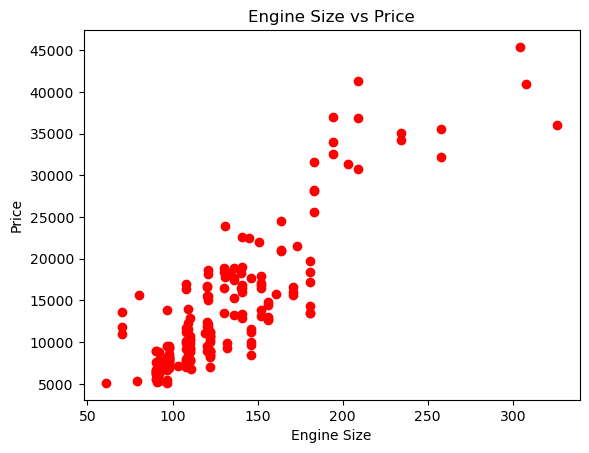

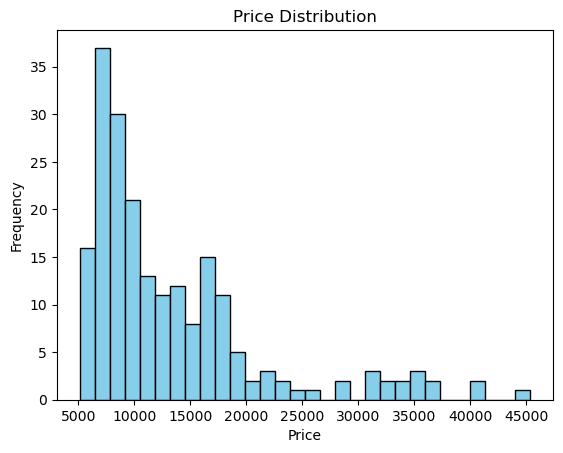

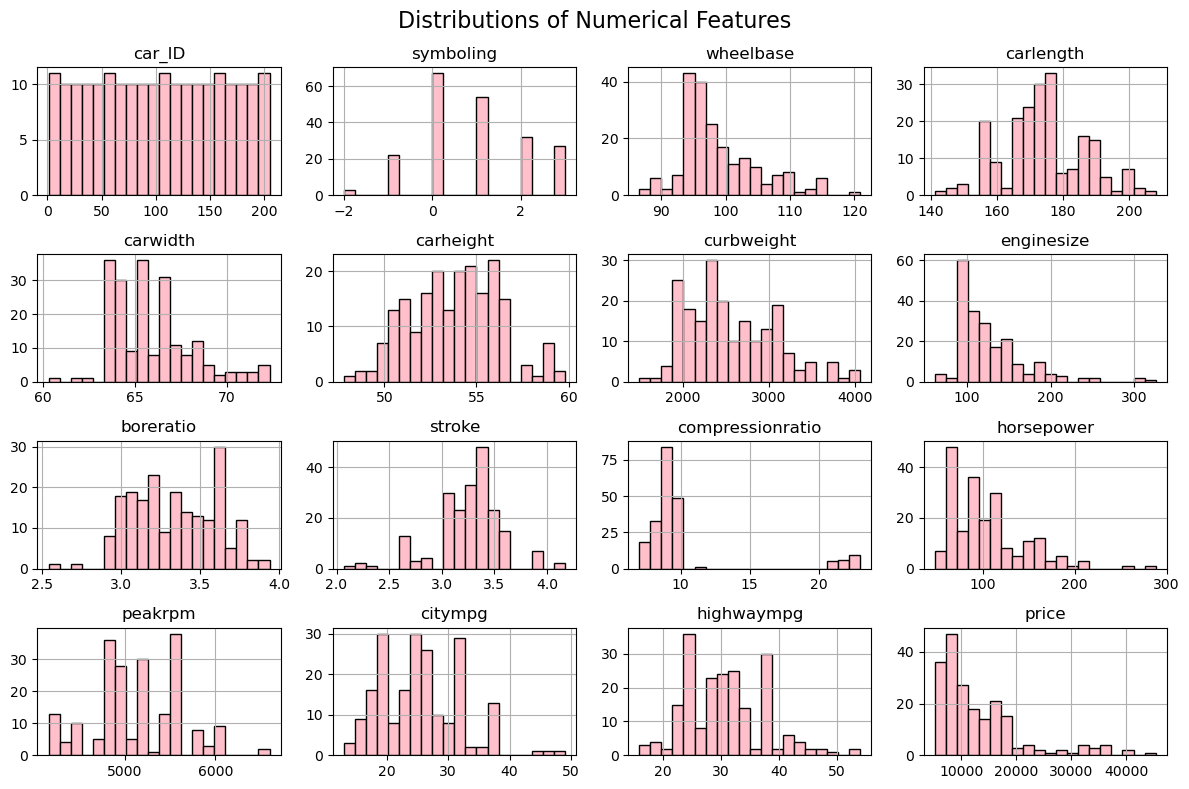

In [11]:
plt.scatter(car_df['enginesize'], car_df['price'], color='red')
plt.title("Engine Size vs Price")
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


plt.hist(car_df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title("Price Distribution")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


car_df.hist(bins=20, figsize=(12, 8), color='pink', edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

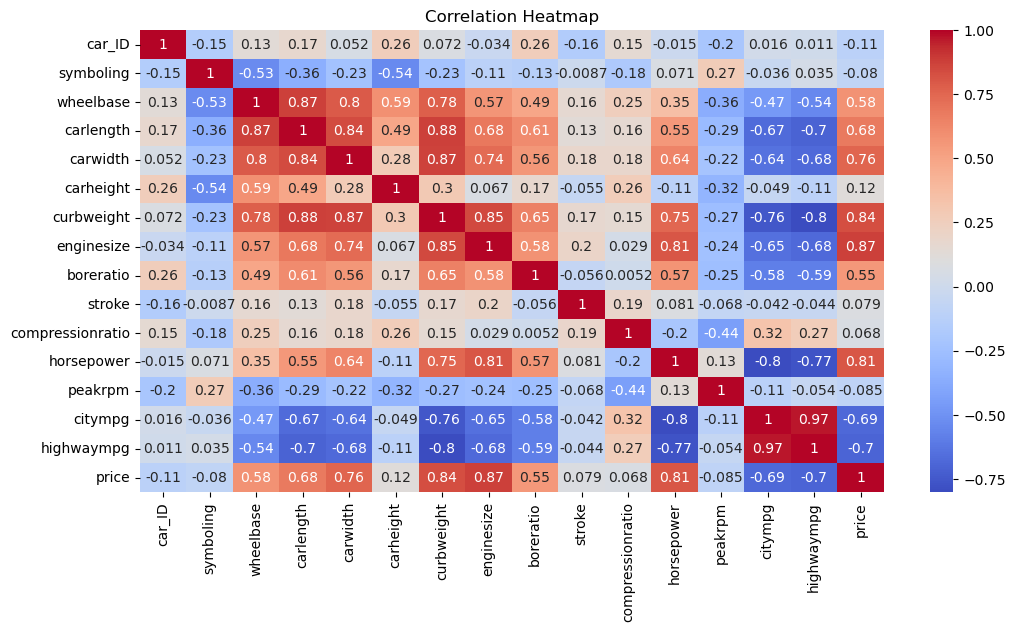

In [12]:
car_df_numeric = car_df.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 6))
sns.heatmap(car_df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### **Regression Analysis**

#### **Multiple linear Regression**

At this stage, we used multiple features (horsepower, enginesize, curbweight highwaympg) to predict the dependent variable(price), and then compared the results of the multivariate model with the results of simple linear regression to see if there was an improvement in performance.

In [13]:
target = 'price'
features = ['horsepower', 'enginesize', 'curbweight', 'highwaympg']

In [14]:
X = car_df[features]
y = car_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (164, 4)
Testing data size: (41, 4)


In [15]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [ 51.68967899  79.04551674   4.02809759 -26.92194077]
Intercept: -11655.564648047053


In [17]:
prediction=regressor.predict(X_test)
prediction

array([26690.94243856, 18675.24592208, 11201.1308839 , 13547.67661346,
       23599.91286667,  6751.30842583,  7832.65501317,  7413.95637374,
       10794.58039937,  6568.83315415, 14853.13142041,  7671.75461938,
       15641.6973332 , 11605.76433387, 37480.18498243,  5914.96587981,
         214.26281456, 18936.01330486, 11362.75273963, 10304.42723596,
       11176.13451163, 22383.18442588,  6670.74647407,  4060.9706399 ,
        5962.28238296, 27295.15707677, 15288.68081857, 16849.91035733,
        6787.56130412, 16358.48245158, 22653.30993347,  5873.66423602,
        7184.22436118, 20459.15202963,  9195.85435231, 22572.7479817 ,
       11948.69419101,  8065.94672323,  5608.80423002, 19310.62638055,
        9482.74620873])

In [18]:
# Train a multiple linear regression model and make predictions on the test set
multi_lin_reg = LinearRegression()
multi_lin_reg.fit(X_train, y_train)
y_pred_multi = multi_lin_reg.predict(X_test)

In [19]:
# Evaluate the performance of the multiple linear regression model using R² and MSE
print("Multiple Linear Regression:")
print("R²:", r2_score(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))

Multiple Linear Regression:
R²: 0.818006166602993
MSE: 14367324.983662264


In [20]:
# Evaluate the model's performance using MAE, MSE, and R² score
print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print("R² Score:", r2_score(y_test, prediction))

2747.9180073872903
14367324.983662264
R² Score: 0.818006166602993


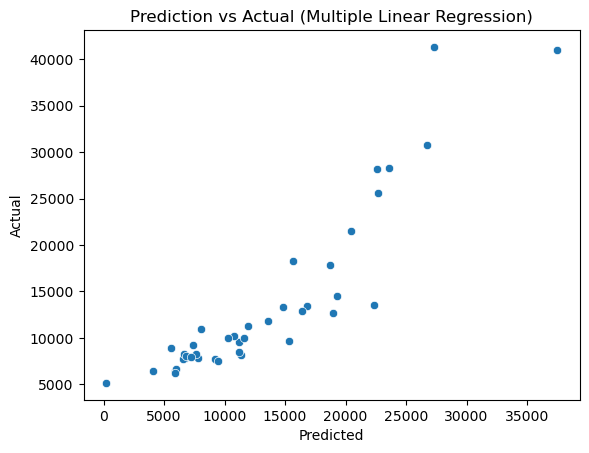

In [21]:
# Visualize the relationship between predicted and actual values using a scatter plot
sns.scatterplot(x=prediction, y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Prediction vs Actual (Multiple Linear Regression)")
plt.show()

#### **Simple linear regression**

At this stage, we selected one feature that was most closely related to the dependent variable. We then applied a simple linear regression model using only this feature. The regression line was then displayed, along with metrics such as R² and MSE, to evaluate the model's performance.

In [22]:
simple_feature = 'enginesize'
X_simple = car_df[[simple_feature]]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_s, y_train_s)
y_pred_s = lin_reg.predict(X_test_s)

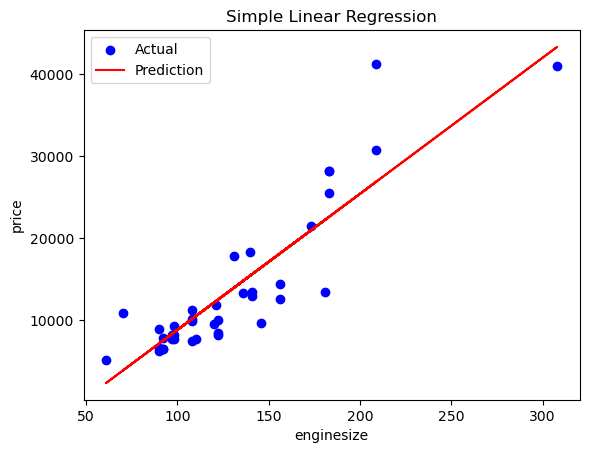

In [24]:
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Prediction')
plt.title("Simple Linear Regression")
plt.xlabel(simple_feature)
plt.ylabel(target)
plt.legend()
plt.show()

In [25]:
print("Simple Linear Regression:")
print("R²:", r2_score(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))

Simple Linear Regression:
R²: 0.8040958796678975
MSE: 15465458.96590847


#### **polynomial regression**

At this stage, we applied polynomial regression to the best feature selected in simple linear regression. We tried multiple polynomial scores (2, 3, and 4) and modified the features if necessary. The different models were compared using  plots and metrics to determine the best model.


Polynomial Regression (degree 2)
R²: 0.8019117595258544
MSE: 15637882.192005603


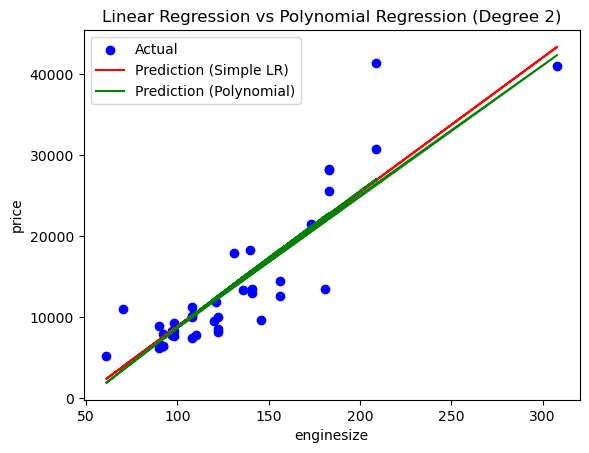


Polynomial Regression (degree 3)
R²: 0.8527894915178196
MSE: 11621389.455322275


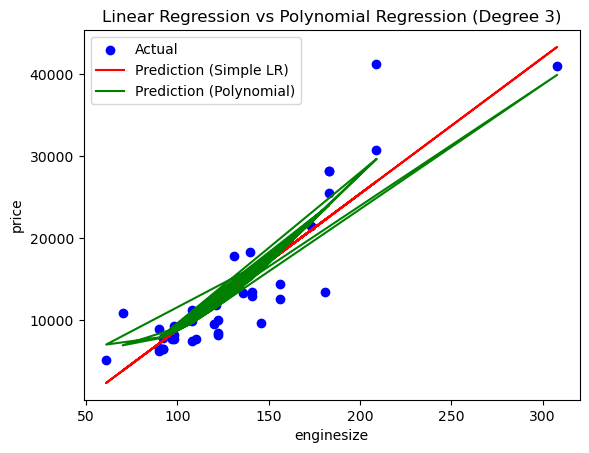


Polynomial Regression (degree 4)
R²: 0.8524297353574273
MSE: 11649790.053159868


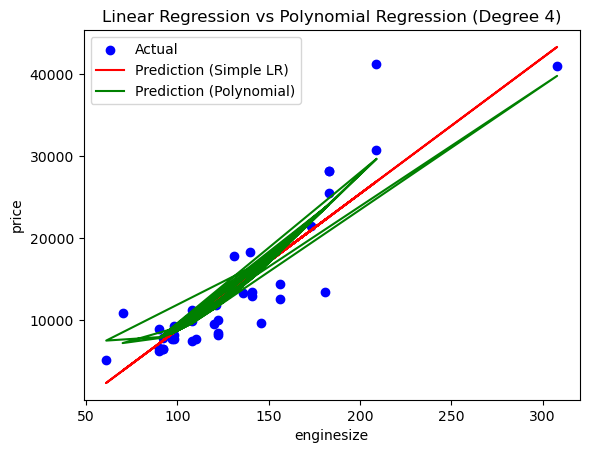


Polynomial Regression (degree 5)
R²: 0.8297362522420452
MSE: 13441304.858052753


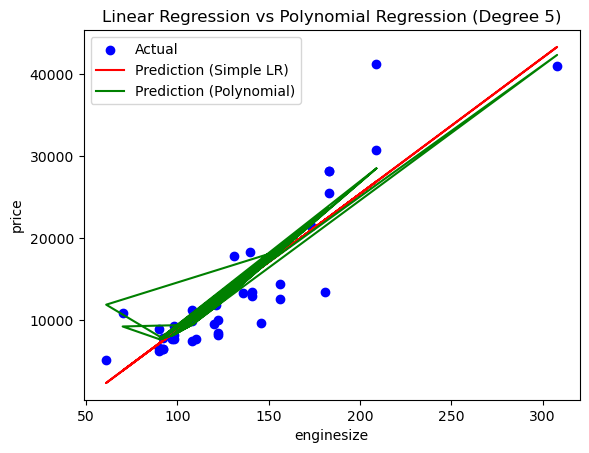

In [26]:
results = []

for degree in [2, 3, 4, 5]:
    print(f"\nPolynomial Regression (degree {degree})")
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_simple)

    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)

    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_p, y_train_p)
    y_pred_poly = poly_reg.predict(X_test_p)

    print("R²:", r2_score(y_test_p, y_pred_poly))
    print("MSE:", mean_squared_error(y_test_p, y_pred_poly))

    # Visualize comparison between Simple Linear Regression and Polynomial Regression
    plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
    plt.plot(X_test_s, y_pred_s, color='red', label='Prediction (Simple LR)')
    plt.plot(X_test_s, y_pred_poly, color='green', label='Prediction (Polynomial)')
    plt.title(f"Linear Regression vs Polynomial Regression (Degree {degree})")
    plt.xlabel(simple_feature)
    plt.ylabel(target)
    plt.legend()
    plt.show()

results.append({
        'Model': f'Polynomial Regression (degree {degree})',
        'R2 Score': r2_score(y_test_p, y_pred_poly),
        'MSE': mean_squared_error(y_test_p, y_pred_poly)
    })

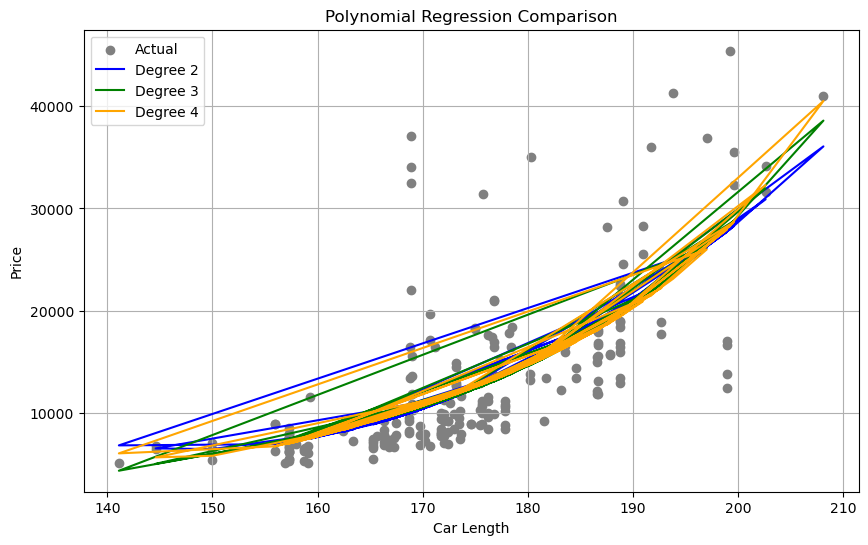

In [27]:
X = car_df[['carlength']]
y = car_df['price']

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Actual')

for degree, color in zip([2, 3, 4], ['blue', 'green', 'orange']):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    plt.plot(X, y_pred, label=f'Degree {degree}', color=color)

plt.title('Polynomial Regression Comparison')
plt.xlabel('Car Length')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

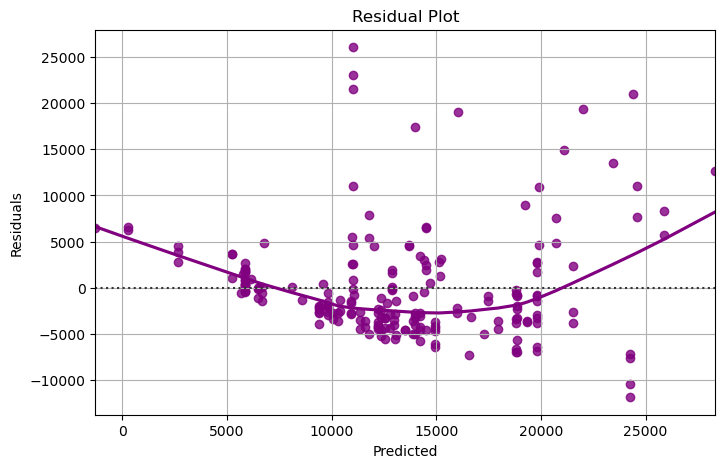

In [28]:
# Calculate residuals (difference between actual and predicted values) and visualize their distribution
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='purple')
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()